## Investigating my Boston Marathon Data
This file contains the data analysis for the 2017 Boston Marathon


Qualifying times
First I inserted the qualifying times to guide my research and data exploration qualifying times



Men
* 18-34	3:05:00	3:02:32
* 35-39	3:10:00	3:07:32
* 40-44	3:15:00	3:12:32
* 45-49	3:25:00	3:22:32
* 50-54	3:30:00	3:27:32
* 55-59	3:40:00	3:37:32
* 60-64	3:55:00	3:52:32
* 65-69	4:10:00	4:07:32
* 70-74	4:25:00	4:22:32
* 75-79	4:40:00	4:37:32
* 80+	    4:55:00	4:52:32

Women
* 18-34	3:35:00	3:32:32
* 35-39	3:40:00	3:37:32
* 40-44	3:45:00	3:42:32
* 45-49	3:55:00	3:52:32
* 50-54	4:00:00	3:57:32
* 55-59	4:10:00	4:07:32
* 60-64	4:25:00	4:22:32
* 65-69	4:40:00	4:37:32
* 70-74	4:55:00	4:52:32
* 75-79	5:10:00	5:07:32
* 80+   5:25:00	5:22:32

These are some of the questions that I looked at with the analysis

* How many participants are there per age group?
* What is the age group with the most participants?
* What is the mean finish time for each age group separated by gender?
* What is the mean finish time difference between males and females in the same age division?

In [1]:
import pandas as pd 

In [2]:
Y2017=pd.read_csv("Boston_Marathon_Data/marathon_results_2017.csv")

In [3]:
Y2017.shape

(26410, 25)

* We have 26410 participants and 25 columns 

In [5]:
Y2017.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [6]:
Y2017.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


* The most important columns in our data are: age, pace, official time, gender, and time at each 5k mark

In [7]:
Y2017['Age'].value_counts()


45    1127
46     976
40     926
47     843
50     815
41     801
35     800
48     784
42     758
36     733
39     712
43     706
37     687
49     686
55     682
38     670
51     658
44     651
52     638
29     636
30     629
33     591
28     590
31     583
53     573
27     571
32     563
26     557
34     540
56     504
      ... 
58     345
23     307
59     284
62     271
22     210
65     187
63     157
21     147
66     137
64     117
67     100
20      83
70      78
68      67
69      47
19      43
71      25
73      22
18      20
72      19
74      17
75      15
76      10
77       5
78       4
80       3
79       3
81       2
83       1
84       1
Name: Age, Length: 66, dtype: int64

* The age group with the most amount of participants is 45 years of age. 
* The age groups with the least amount of participants are 81 and 79

In [8]:
Y2017['Pace'].describe()

count       26410
unique        561
top       0:08:43
freq          157
Name: Pace, dtype: object

In [9]:
Y2017.groupby('M/F')['Age'].value_counts()

M/F  Age
F    45     497
     40     459
     35     420
     46     412
     41     396
     29     370
     42     370
     39     364
     26     361
     47     361
     38     358
     28     355
     37     355
     27     354
     36     352
     43     346
     30     344
     50     335
     48     328
     25     318
     33     302
     31     292
     24     286
     32     283
     44     283
     34     269
     51     267
     49     265
     52     246
     55     234
           ... 
M    26     196
     59     193
     25     180
     24     164
     65     146
     63     122
     23     118
     66     105
     64      95
     22      86
     67      81
     21      68
     70      65
     68      56
     20      43
     69      38
     19      23
     71      22
     73      19
     72      17
     74      15
     76      10
     18       9
     75       7
     77       4
     78       4
     79       3
     80       3
     81       2
     83       1
Name: Age, Leng

I am grouping the data by gender and age to see how many participants we have separated by gender. For females 40 years has the most amount of participants. For males 25 years has the most amount of participants

In [10]:
age_cuts=[18,35,40,45,50,55,60,65,70,75,80,100]
age_bands=['18-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79','80 and over']

I am creating the age band divisions used for the qualifying times

In [11]:
len(age_cuts)

12

In [13]:
Y2017['Age_band']=pd.cut(Y2017['Age'], bins=age_cuts, labels=age_bands, 
       right=False)

In [14]:
Y2017.groupby(['M/F', 'Age_band']).size()

M/F  Age_band   
F    18-34          3997
     35-39          1849
     40-44          1854
     45-49          1863
     50-54          1223
     55-59           698
     60-64           343
     65-69           112
     70-74            23
     75-79             9
     80 and over       1
M    18-34          3021
     35-39          1753
     40-44          1988
     45-49          2553
     50-54          1945
     55-59          1537
     60-64          1043
     65-69           426
     70-74           138
     75-79            28
     80 and over       6
dtype: int64

Now I have separated participants by age group and gender

Next I created a function to turn the time in hours minutes seconds into minutes

In [15]:
def time_str_to_mins(tstr):
    '''
    convert a string with a race time of the form
    H:M:S, e.g. 3:43:20 to the number of minute
    H*60 + M + S/60
    '''
    
    H,M,S = tstr.split(':')
    
    total_minutes = int(H)*60 + int(M) + int(S)/60
    
    return total_minutes

In [16]:
t="3:24:12"
t.split(':')

['3', '24', '12']

In [17]:
time_str_to_mins(t)

204.2

In [18]:
Y2017['Offical_Time_Mins']=Y2017['Official Time'].map(time_str_to_mins)

In [19]:
Y2017['Offical_Time_Mins'].mean()

238.0592559636496

In [20]:
Y2017.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack()

M/F,F,M
Age_band,,
18-34,243.022342,214.647942
35-39,240.818316,215.287669
40-44,246.617629,219.913758
45-49,251.506602,226.472327
50-54,257.742750,235.811714
55-59,266.317932,242.279397
60-64,278.988727,256.456647
65-69,292.231548,271.055164
70-74,299.328261,289.150483


These are the mean official times by gender and age band in minutes

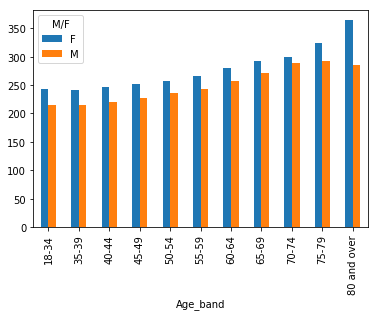

In [22]:
Y2017.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().plot(kind='bar')

The graph illustrates the mean finish time by age group and gender

In [23]:
Y2017.groupby(['Age_band', 'M/F'])['Offical_Time_Mins'].mean().unstack().diff(-1, axis=1)

M/F,F,M
Age_band,,
18-34,28.374400,NaN
35-39,25.530647,NaN
40-44,26.703871,NaN
45-49,25.034276,NaN
50-54,21.931036,NaN
55-59,24.038535,NaN
60-64,22.532079,NaN
65-69,21.176383,NaN
70-74,10.177778,NaN


The table shows the mean finish time difference between males and females by age group. We can see that it changes by age band significantly

I stopped carrying out further analysis in this notebook because I realized it would be better to do my analysis with the grouped data from all three years of the race. That way I could have more data and thus all my averages with have a chance to be more accurate and less prone to high standard deviations.